In [2]:
import pandas as pd
import random

specialties = {
    "Cardiology": [
        "Patient presents with chest pain and shortness of breath.",
        "History of hypertension and irregular heartbeat.",
        "Echocardiogram reveals left ventricular hypertrophy."
    ],
    "Oncology": [
        "CT scan shows metastatic lesions in the liver.",
        "Patient undergoing chemotherapy for breast cancer.",
        "Biopsy confirms non-small cell lung carcinoma."
    ],
    "Neurology": [
        "Complains of frequent migraines and aura symptoms.",
        "Diagnosed with epilepsy and currently on lamotrigine.",
        "Reports numbness and tingling in extremities."
    ],
    "Gastroenterology": [
        "Patient reports nausea, vomiting, and acid reflux.",
        "History of Crohn’s disease with recent flare-up.",
        "Colonoscopy reveals inflamed mucosal lining."
    ],
    "Pulmonology": [
        "Persistent dry cough and night sweats.",
        "History of asthma since childhood.",
        "Chest X-ray shows bilateral infiltrates."
    ]
}

severities = ["Mild", "Moderate", "Severe"]
genders = ["Male", "Female", "Other"]
visit_types = ["Inpatient", "Outpatient", "Emergency"]

data = []
for _ in range(500):
    specialty = random.choice(list(specialties.keys()))
    note = random.choice(specialties[specialty])
    severity = random.choice(severities)
    age = random.randint(18, 90)
    gender = random.choice(genders)
    visit_type = random.choice(visit_types)

    data.append({
        "Note": note,
        "Specialty": specialty,
        "Severity": severity,
        "Patient Age": age,
        "Gender": gender,
        "Visit Type": visit_type
    })

df = pd.DataFrame(data)
df.to_csv("clinical_notes.csv", index=False)


In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load your dataset
df = pd.read_csv("clinical_notes_dataset.csv")

# Features and labels
X = df["Note"]
y = df["Specialty"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_vec, y_train)

# Predictions
y_pred = clf.predict(X_test_vec)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

                  precision    recall  f1-score   support

      Cardiology       1.00      1.00      1.00        21
Gastroenterology       1.00      1.00      1.00        19
       Neurology       1.00      1.00      1.00        19
        Oncology       1.00      1.00      1.00        21
     Pulmonology       1.00      1.00      1.00        20

        accuracy                           1.00       100
       macro avg       1.00      1.00      1.00       100
    weighted avg       1.00      1.00      1.00       100



In [5]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained GPT-2 model and tokenizer
model_name = "gpt2"  # You can try other models such as "gpt2-medium" or "gpt2-large" for better results
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Ensure padding and truncation are set
tokenizer.pad_token = tokenizer.eos_token

# Define a function to classify notes based on few-shot prompting
def classify_note_with_few_shot(note):
    prompt = f"""Classify the following clinical note into a medical specialty:
    Text: {note}
    Options: Cardiology, Oncology, Neurology, Gastroenterology, Pulmonology
    Answer:"""

    # Tokenize the input and create tensor inputs for GPT-2
    inputs = tokenizer.encode(prompt, return_tensors='pt')

    # Generate the output from the model
    outputs = model.generate(inputs, max_length=250, num_return_sequences=1, no_repeat_ngram_size=2, top_k=50, top_p=0.95, temperature=0.7)

    # Decode the output and extract the predicted specialty
    decoded_output = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return decoded_output.split("Answer:")[-1].strip()

# Example clinical notes
notes = [
    "Patient presents with chest pain and shortness of breath.",
    "CT scan shows metastatic lesions in the liver.",
    "Complains of frequent migraines and aura symptoms."
]

# Classify each note
for note in notes:
    classification = classify_note_with_few_shot(note)
    print(f"Note: {note}\nClassified as: {classification}\n")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpe

Note: Patient presents with chest pain and shortness of breath.
Classified as: Chest pain is a common symptom of the common cold. Chest Pain is the most common cause of death in the United States. The most commonly reported cause is pneumonia. It is caused by a bacterial infection, which is usually caused in a person with a cold or a cough. A cold is often caused when the body is cold and the air is not warm enough to breathe. Colds are caused because of a lack of oxygen in your body. When you are cold, your lungs are not able to produce oxygen. Your body's ability to make oxygen is limited. If you have a heart attack, you may have to take oxygen from your blood. You may also have an infection that causes a fever. Heart attacks are a serious medical condition that can cause serious health problems. They can be life-threatening. In addition, heart attacks can lead to death. There are many causes of heart disease. Some of these include:  Heart disease is an inherited



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Note: CT scan shows metastatic lesions in the liver.
Classified as: The liver is a very important organ in many different areas of the body. It is the primary organ of control for the development of disease. The body is also the source of many other important functions, such as the immune system, the digestive system and the nervous system. In addition, it is responsible for many functions that are not normally associated with the normal body, including the production of hormones, vitamins, minerals, and other substances. For example, liver disease is caused by a deficiency of certain vitamins and minerals. This deficiency can lead to liver failure, which can cause liver damage. If you have liver cancer, you may need to seek medical attention. You may also need treatment for other conditions, like diabetes, heart disease, or cancer. Your doctor may recommend that you seek treatment with a liver transplant.

Note: Complains of frequent migraines and aura symptoms.
Classified as: The fol

In [8]:
pip install transformers datasets torch scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [14]:
import torch
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Load the dataset (you should use your own dataset)
import pandas as pd
df = pd.read_csv("clinical_notes_dataset.csv")

# Map specialty strings to integers
label_map = {label: idx for idx, label in enumerate(df['Specialty'].unique())}
df['Label'] = df['Specialty'].map(label_map)

# Split the dataset into training and validation sets (70/30 split)
train_texts, val_texts, train_labels, val_labels = train_test_split(df['Note'], df['Label'], test_size=0.3)

# Reset indices of train and validation data
train_texts.reset_index(drop=True, inplace=True)
val_texts.reset_index(drop=True, inplace=True)
train_labels.reset_index(drop=True, inplace=True)
val_labels.reset_index(drop=True, inplace=True)

# Load the tokenizer (you can use 'bert-base-uncased' or 'emilyalsentzer/clinicalbert')
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the texts
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=128)

# Create torch datasets
class ClinicalDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])  # Labels are now integers
        return item

    def __len__(self):
        return len(self.labels)

# Prepare datasets
train_dataset = ClinicalDataset(train_encodings, train_labels)
val_dataset = ClinicalDataset(val_encodings, val_labels)

# Load a pre-trained model (you can use 'bert-base-uncased' or 'emilyalsentzer/clinicalbert')
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(df['Specialty'].unique()))

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",   # Make sure this is "epoch"
    save_strategy="epoch",         # Save strategy also set to "epoch"
    load_best_model_at_end=True,   # Load the best model at the end of training
)

# Compute F1 score for evaluation
def compute_metrics(p):
    preds, labels = p
    preds = torch.argmax(torch.tensor(preds), axis=1)
    f1 = f1_score(labels, preds, average='weighted')
    return {'f1': f1}

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()
print(results)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,F1
1,1.526400,1.390930,0.406874
2,1.097200,0.885982,0.826852
3,0.513200,0.334098,1.000000


{'eval_loss': 0.33409789204597473, 'eval_f1': 1.0, 'eval_runtime': 11.125, 'eval_samples_per_second': 13.483, 'eval_steps_per_second': 1.708, 'epoch': 3.0}


In [17]:
model.save_pretrained('./results')
tokenizer.save_pretrained('./results')


('./results/tokenizer_config.json',
 './results/special_tokens_map.json',
 './results/vocab.txt',
 './results/added_tokens.json',
 './results/tokenizer.json')

In [18]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import classification_report

# Load the fine-tuned model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained('./results')  # Path to saved model
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')  # Use the same tokenizer

# Prepare the validation set for predictions
val_texts = list(val_texts)  # Convert the validation texts to list if it's not
val_labels = list(val_labels)  # Convert labels to list if needed

# Tokenize the validation texts
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)

# Create the validation dataset
class ClinicalDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])  # Labels are now integers
        return item

    def __len__(self):
        return len(self.labels)

val_dataset = ClinicalDataset(val_encodings, val_labels)

# Prepare the Trainer for evaluation
trainer = Trainer(
    model=model,
    tokenizer=tokenizer,
)

# Make predictions on the validation dataset
predictions = trainer.predict(val_dataset)

# Get the predicted labels from the output
predicted_labels = predictions.predictions.argmax(axis=1)

# Print classification report to evaluate
print(classification_report(val_labels, predicted_labels))



<ipython-input-18-c13b236b8672>:33: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        31

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [19]:
# Example new clinical notes for prediction
new_notes = [
    "Patient shows signs of chest pain and difficulty breathing.",
    "The patient has severe abdominal pain and vomiting."
]

# Tokenize the new notes
new_encodings = tokenizer(new_notes, truncation=True, padding=True, max_length=128)

# Prepare the dataset
new_dataset = ClinicalDataset(new_encodings, [0]*len(new_notes))  # We pass dummy labels here, as they aren't needed for prediction

# Make predictions on the new notes
new_predictions = trainer.predict(new_dataset)

# Get the predicted labels
new_predicted_labels = new_predictions.predictions.argmax(axis=1)

# Map predictions back to their specialty names
label_map_inverse = {v: k for k, v in label_map.items()}
predicted_specialties = [label_map_inverse[label] for label in new_predicted_labels]

print(predicted_specialties)


['Cardiology', 'Cardiology']


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        31

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



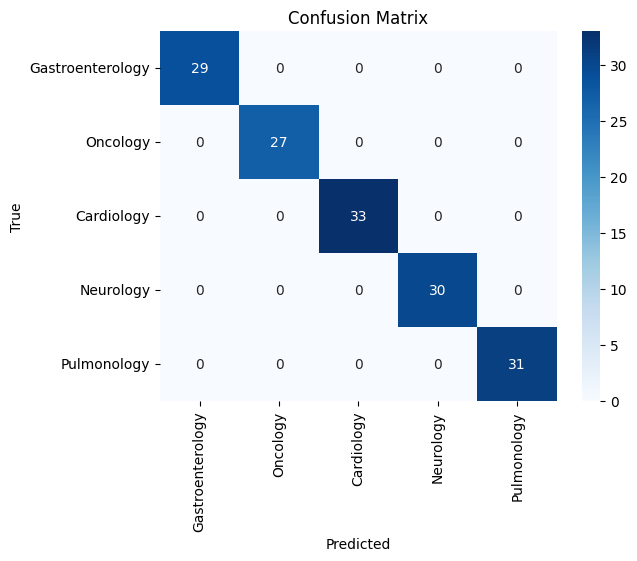

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ensure true_labels are numerical (Convert list to numerical labels)
label_mapping = {label: idx for idx, label in enumerate(df["Specialty"].unique())}
true_labels = [label_mapping[label] for label in test_dataset['Specialty']]  # Convert list of labels to numeric

# Get the predicted labels (indices of the highest prediction probability)
predicted_labels = predictions.predictions.argmax(axis=-1)

# Classification report
print(classification_report(true_labels, predicted_labels))

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df["Specialty"].unique(), yticklabels=df["Specialty"].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
